In [91]:
import pyswarms as ps
import psopy
import math
import pandas as pd
import numpy as np

In [92]:

# Import modules
import numpy as np

# Import sphere function as objective function

# Import backend modules
import pyswarms.backend as P
from pyswarms.backend.topology import Star

import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
import matplotlib.pyplot as plt
from pyswarms.utils.plotters.formatters import Mesher, Designer

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 22])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Datframe

In [93]:
df = pd.read_csv('data/icr-nliq-combined.csv')
df = df.fillna(0)
df['ICR'] = df['ICR'].replace(0,0.01)
df

,Institute,Articles,Articles w/ IC,Total Citations,Parent Country Citations,ICR,NLIQ
0,AGH University of Science & Technology,29,3.0,54,33,0.306173,0.388889
1,Al Azhar University,5,1.0,74,17,0.666667,0.770270
2,Al-Imam Muhammad Ibn Saud Islamic University,2,0.0,7,2,0.010000,0.714286
3,Alexandria University,5,2.0,46,3,0.583333,0.934783
4,Amity University,3,0.0,3,1,0.010000,0.666667
5,Amrita Vishwa Vidyapeetham,4,0.0,10,1,0.010000,0.900000
6,Ankara University,3,2.0,12,2,0.284375,0.833333
7,Aoyama Gakuin University,15,0.0,29,6,0.010000,0.793103
8,Arizona State University,80,19.0,558,189,0.387015,0.661290
9,Auburn University,7,1.0,52,7,1.000000,0.865385


# CES function

In [99]:
class Q:
    def setparams(self,alpha=0.1,eta=1,K=0.306173,L=0.388889):
        self.K = K
        self.L = L
        self.alpha = alpha
        self.eta = eta
        
    def Q(self,rho):
        q1 = (self.alpha * self.K**rho) + (1 - self.alpha)*(self.L**rho)
        q = q1 ** (self.eta/rho)
        return q

    def Q1(self,rho):
        q = self.Q(rho)
        if (self.K**self.alpha)*(self.L**(1-self.alpha)) == 0:
            return 0
        q1_1 = q ** (-rho/self.eta) * math.log( (self.K**self.alpha)*(self.L**(1-self.alpha)) )
        if q == 0:
            return 0
        q1 = q1_1 / math.log(q)
        return q1
    

q =Q()
q.setparams(K=0.3061728395, L=0.38888888899999996)
def f(x):
    l,r = x.shape
    F = []
    for i in range(l):
        temp = []
        for j in range(r):
            #t = x[i][j]*math.sin(math.pi*x[i][j]*10)+1.0
            t = q.Q(x[i][j]) 
            #temp.append(t)
        F.append(t)
    #print(F)
    return np.array(F)

In [46]:
q.Q(0.10114881)

0.37979738702115545

# PSO optimization using inbuilt pySwarm

2020-04-07 20:48:07,682 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.38
2020-04-07 20:48:07,854 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.3797002769559976, best pos: [0.00113296]


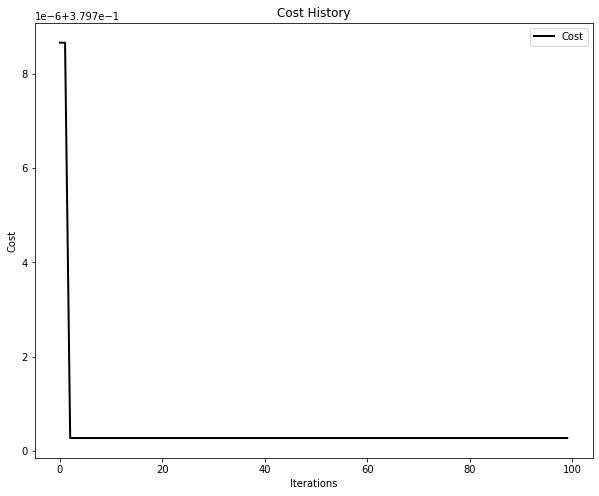

In [47]:
max_bound = 0.1 * np.ones(1)
min_bound = 0.001 * np.ones(1)
bounds = (min_bound, max_bound)
# Set-up optimizer
options = {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=25, dimensions=1, options=options, bounds=bounds)
optimizer.optimize(f, iters=100)
# Plot the cost
plot_cost_history(optimizer.cost_history)
plt.savefig('cost.png')
plt.show()


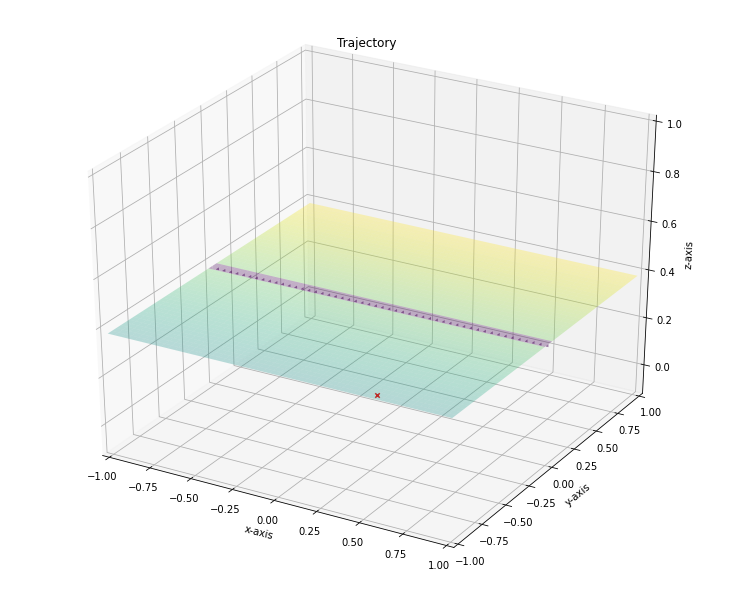

In [48]:
# Plot the sphere function's mesh for better plots
m = Mesher(func=f,
           limits=[(-1,1), (-1,1)])
# Adjust figure limits
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)],
             label=['x-axis', 'y-axis', 'z-axis'])

pos_history_3d = m.compute_history_3d(optimizer.pos_history) # preprocessing
animation3d = plot_surface(pos_history=pos_history_3d,
                           mesher=m, designer=d,
                           mark=(0,0,0))   

# Cost for each datapoint

In [136]:
# Set constraints and options
max_bound = 1 * np.ones(1)
min_bound = 0 * np.ones(1)
bounds = (min_bound,max_bound)
options = {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
print(bounds)

(array([0.]), array([1.]))


In [137]:
costs = []
positions = []
K =[]
L=[]
for d in range(len(df))[:]:
    q.setparams(K=df['ICR'][d],L=df['NLIQ'][d])
    print(q.K,q.L)

    # Set-up optimizer
    optimizer = ps.single.GlobalBestPSO(n_particles=25, dimensions=1, options=options,bounds =bounds)
    cost,pos = optimizer.optimize(f, iters=100)
    while pos[0] >max_bound[0] or pos[0]<min_bound[0]:
        optimizer = ps.single.GlobalBestPSO(n_particles=25, dimensions=1, options=options)
        cost,pos = optimizer.optimize(f, iters=100)
    print('Cost: %f\nPosition%f'%(cost,pos))
    # Plot the cost
    costs.append(cost)
    positions.append(pos[0])

2020-04-08 12:21:58,748 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.38
2020-04-08 12:21:58,880 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.37969927300489364, best pos: [0.00010548]
2020-04-08 12:21:58,892 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.759

0.3061728395 0.38888888899999996
Cost: 0.379699
Position0.000105
0.6666666667 0.77027027


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.759
2020-04-08 12:21:59,009 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7592236359014146, best pos: [5.79599629e-05]
2020-04-08 12:21:59,023 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.466
2020-04-08 12:21:59,141 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.46611865546701026, best pos: [3.29046083e-05]
2020-04-08 12:21:59,149 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.892

Cost: 0.759224
Position0.000058
0.01 0.7142857140000001
Cost: 0.466119
Position0.000033
0.5833333333 0.9347826090000001


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.892
2020-04-08 12:21:59,263 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.8917259851775889, best pos: [4.17136236e-05]
2020-04-08 12:21:59,271 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.438
2020-04-08 12:21:59,436 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.4380566171010901, best pos: [3.59113407e-05]
2020-04-08 12:21:59,443 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.575

Cost: 0.891726
Position0.000042
0.01 0.666666667
Cost: 0.438057
Position0.000036
0.01 0.9


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.574
2020-04-08 12:21:59,560 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5742915778423291, best pos: [0.00079473]
2020-04-08 12:21:59,567 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.748
2020-04-08 12:21:59,731 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7484098634800112, best pos: [0.00059693]
2020-04-08 12:21:59,737 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.512

Cost: 0.574292
Position0.000795
0.284375 0.833333333
Cost: 0.748410
Position0.000597
0.01 0.793103448


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.512
2020-04-08 12:21:59,956 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.512304720081033, best pos: [0.00035195]
2020-04-08 12:21:59,965 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.627
2020-04-08 12:22:00,104 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.6268161251022023, best pos: [0.00257298]
2020-04-08 12:22:00,112 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.878

Cost: 0.512305
Position0.000352
0.3870150286 0.661290323
Cost: 0.626816
Position0.002573
1.0 0.865384615


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.878
2020-04-08 12:22:00,218 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.8779880946402089, best pos: [0.00091555]
2020-04-08 12:22:00,225 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.871
2020-04-08 12:22:00,328 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.871051946624597, best pos: [0.00028426]
2020-04-08 12:22:00,336 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.748

Cost: 0.877988
Position0.000916
0.4929128597 0.927932667
Cost: 0.871052
Position0.000284
0.3229166667 0.8214285709999999


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.748
2020-04-08 12:22:00,476 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7482142081917743, best pos: [0.00023956]
2020-04-08 12:22:00,489 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:  37%|███▋      |37/100, best_cost=0.627

Cost: 0.748214
Position0.000240
0.2708333333 0.688888889


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.627
2020-04-08 12:22:00,701 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.6274947169836564, best pos: [0.0003288]
2020-04-08 12:22:00,709 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.847
2020-04-08 12:22:00,833 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.8474283363456908, best pos: [1.86119265e-06]
2020-04-08 12:22:00,842 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.734

Cost: 0.627495
Position0.000329
0.3333333333 0.94
Cost: 0.847428
Position0.000002
0.4088541667 0.78358209


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.734
2020-04-08 12:22:00,981 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7342559668602658, best pos: [0.00176481]
2020-04-08 12:22:00,992 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.639
2020-04-08 12:22:01,126 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.6387843113436017, best pos: [0.00036969]
2020-04-08 12:22:01,149 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.405

Cost: 0.734256
Position0.001765
0.3941666667 0.673983215
Cost: 0.638784
Position0.000370
0.01 0.609631728


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.404
2020-04-08 12:22:01,337 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.40432160494470054, best pos: [0.00050348]
2020-04-08 12:22:01,345 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.58
2020-04-08 12:22:01,450 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.580193098740866, best pos: [0.00032346]
2020-04-08 12:22:01,457 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.849

Cost: 0.404322
Position0.000503
0.01 0.9107142859999999
Cost: 0.580193
Position0.000323
0.8571428570999999 0.848552339


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.849
2020-04-08 12:22:01,562 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.8494075031347825, best pos: [0.00025275]
2020-04-08 12:22:01,570 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.545
2020-04-08 12:22:01,691 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5453682053513297, best pos: [8.861547e-05]
2020-04-08 12:22:01,700 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.582

Cost: 0.849408
Position0.000253
0.6666666667 0.533333333
Cost: 0.545368
Position0.000089
0.01 0.913043478


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.582
2020-04-08 12:22:01,919 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5816930809418903, best pos: [0.0006322]
2020-04-08 12:22:01,944 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.749
2020-04-08 12:22:02,045 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7492926098303001, best pos: [0.00011461]
2020-04-08 12:22:02,051 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.769

Cost: 0.581693
Position0.000632
0.30305555559999997 0.828571429
Cost: 0.749293
Position0.000115
0.4633333333 0.812977099


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.769
2020-04-08 12:22:02,158 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7685296327860772, best pos: [0.00012661]
2020-04-08 12:22:02,166 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.805
2020-04-08 12:22:02,330 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.805265352168643, best pos: [0.00014996]
2020-04-08 12:22:02,337 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.672

Cost: 0.768530
Position0.000127
0.5571428571 0.838905775
Cost: 0.805265
Position0.000150
0.4133333333 0.708737864


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.672
2020-04-08 12:22:02,441 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.671535662729094, best pos: [0.00034607]
2020-04-08 12:22:02,449 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.405
2020-04-08 12:22:02,560 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.4050888165978004, best pos: [0.00016265]
2020-04-08 12:22:02,568 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.603

Cost: 0.671536
Position0.000346
0.01 0.611092878
Cost: 0.405089
Position0.000163
0.5 0.615384615


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.603
2020-04-08 12:22:02,737 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.6027392817547753, best pos: [0.00062292]
2020-04-08 12:22:02,743 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.556
2020-04-08 12:22:02,850 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5557257986061802, best pos: [8.34371894e-06]
2020-04-08 12:22:02,857 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.267

Cost: 0.602739
Position0.000623
0.01 0.8684210529999999
Cost: 0.555726
Position0.000008
0.01 0.384615385


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.267
2020-04-08 12:22:02,969 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.26707537948703025, best pos: [0.00042223]
2020-04-08 12:22:02,978 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.586
2020-04-08 12:22:03,084 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5857945801570952, best pos: [0.00090424]
2020-04-08 12:22:03,090 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.504

Cost: 0.267075
Position0.000422
0.3333333333 0.623655914
Cost: 0.585795
Position0.000904
0.01 0.7777777779999999


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.504
2020-04-08 12:22:03,192 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.503516186736333, best pos: [0.00065768]
2020-04-08 12:22:03,199 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:  45%|████▌     |45/100, best_cost=0.729

Cost: 0.503516
Position0.000658
0.3149739051 0.8004032259999999


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.729
2020-04-08 12:22:03,399 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7291414000954032, best pos: [0.00037377]
2020-04-08 12:22:03,406 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.788
2020-04-08 12:22:03,536 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7882367537516678, best pos: [5.31685221e-05]
2020-04-08 12:22:03,542 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.727

Cost: 0.729141
Position0.000374
0.4620833333 0.8364249579999999
Cost: 0.788237
Position0.000053
0.3388518519 0.791411043


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.727
2020-04-08 12:22:03,643 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7270670271110266, best pos: [0.00082279]
2020-04-08 12:22:03,650 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.735
2020-04-08 12:22:03,754 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7345904658626413, best pos: [0.000662]
2020-04-08 12:22:03,761 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.833

Cost: 0.727067
Position0.000823
0.5 0.7666666670000001
Cost: 0.734590
Position0.000662
0.37597756409999994 0.91047503


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.833
2020-04-08 12:22:03,871 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.8334097381829572, best pos: [7.47100286e-05]
2020-04-08 12:22:03,877 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.834
2020-04-08 12:22:03,994 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.833569270896753, best pos: [0.00012699]
2020-04-08 12:22:04,001 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.772

Cost: 0.833410
Position0.000075
0.28075664699999997 0.940697674
Cost: 0.833569
Position0.000127
0.29820048309999997 0.8577586209999999


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.772
2020-04-08 12:22:04,100 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7717686901522463, best pos: [0.00035477]
2020-04-08 12:22:04,108 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.44
2020-04-08 12:22:04,283 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.44046626392885174, best pos: [0.00030623]


Cost: 0.771769
Position0.000355
0.01 0.670582227
Cost: 0.440466
Position0.000306
0.1831309524 0.836575875


2020-04-08 12:22:04,306 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.719
2020-04-08 12:22:04,443 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7186734185939276, best pos: [1.33902257e-05]
2020-04-08 12:22:04,450 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.803
2020-04-08 12:22:04,553 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.8026141103730111, best pos: [0.0004175]
2020-04-08 12:22:04,561 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.419

Cost: 0.718673
Position0.000013
0.6775 0.817869416
Cost: 0.802614
Position0.000418
0.01 0.633903652


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.419
2020-04-08 12:22:04,667 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.4186247912109999, best pos: [1.19343442e-05]
2020-04-08 12:22:04,673 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.787
2020-04-08 12:22:04,774 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.7865107869677593, best pos: [6.77685841e-05]
2020-04-08 12:22:04,781 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.451

Cost: 0.418625
Position0.000012
0.3088253158 0.872596154
Cost: 0.786511
Position0.000068
0.01 0.688867124


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.451
2020-04-08 12:22:04,912 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.45130431075464267, best pos: [0.00042171]
2020-04-08 12:22:04,920 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.892
2020-04-08 12:22:05,103 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.8917701572653272, best pos: [0.00031125]
2020-04-08 12:22:05,110 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.519

Cost: 0.451304
Position0.000422
0.75 0.9090909090000001
Cost: 0.891770
Position0.000311
0.01 0.756448989


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.491
2020-04-08 12:22:05,229 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.4909194667088616, best pos: [0.00029695]
2020-04-08 12:22:05,236 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.545
2020-04-08 12:22:05,351 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5454424475472127, best pos: [0.00112352]
2020-04-08 12:22:05,359 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.835

Cost: 0.490919
Position0.000297
0.01 0.84965035
Cost: 0.545442
Position0.001124
0.5167769061 0.8812893079999999


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.835
2020-04-08 12:22:05,465 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.8354854752218508, best pos: [0.00034902]
2020-04-08 12:22:05,473 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.665
2020-04-08 12:22:05,578 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.6648946760273016, best pos: [0.00088505]
2020-04-08 12:22:05,585 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.6, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/100, best_cost=0.659

Cost: 0.835485
Position0.000349
0.521301468 0.683111954
Cost: 0.664895
Position0.000885
0.24333333329999998 0.736


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.659
2020-04-08 12:22:05,690 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.6589124985334244, best pos: [0.00073331]


Cost: 0.658912
Position0.000733


In [139]:
df['cost'] = costs
df['rho'] =positions
t =[]
for i in range(len(df)):
    q.setparams(K=df['ICR'][i],L=df['NLIQ'][i])
    t.append( q.Q(df['rho'][i]))
df['Internationality(1>rho>0)'] = costs
df

,Institute,Articles,Articles w/ IC,Total Citations,Parent Country Citations,ICR,NLIQ,cost,rho,Internationality(1>rho>0)
0,AGH University of Science & Technology,29,3.0,54,33,0.306173,0.388889,0.379699,0.000105,0.379699
1,Al Azhar University,5,1.0,74,17,0.666667,0.770270,0.759224,0.000058,0.759224
2,Al-Imam Muhammad Ibn Saud Islamic University,2,0.0,7,2,0.010000,0.714286,0.466119,0.000033,0.466119
3,Alexandria University,5,2.0,46,3,0.583333,0.934783,0.891726,0.000042,0.891726
4,Amity University,3,0.0,3,1,0.010000,0.666667,0.438057,0.000036,0.438057
5,Amrita Vishwa Vidyapeetham,4,0.0,10,1,0.010000,0.900000,0.574292,0.000795,0.574292
6,Ankara University,3,2.0,12,2,0.284375,0.833333,0.748410,0.000597,0.748410
7,Aoyama Gakuin University,15,0.0,29,6,0.010000,0.793103,0.512305,0.000352,0.512305
8,Arizona State University,80,19.0,558,189,0.387015,0.661290,0.626816,0.002573,0.626816
9,Auburn University,7,1.0,52,7,1.000000,0.865385,0.877988,0.000916,0.877988


In [90]:
df.to_csv('result/combined_v1.csv',index=False)

In [140]:
df[df['Institute'].isin(['Simon Fraser University','Indian Institute of Technology (IIT) - Kharagpur'])]

,Institute,Articles,Articles w/ IC,Total Citations,Parent Country Citations,ICR,NLIQ,cost,rho,Internationality(1>rho>0)
22,Indian Institute of Technology (IIT) - Kharagpur,32,8.0,262,49,0.463333,0.812977,0.768530,0.000127,0.768530
32,Simon Fraser University,66,15.0,593,97,0.462083,0.836425,0.788237,0.000053,0.788237


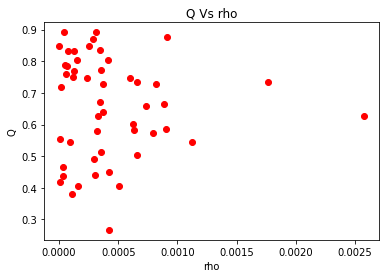

In [144]:
temp = df.sort_values(by=['rho'])
#print(temp)
x = temp['rho']
y = temp['cost']

fig=plt.figure()
#ax=fig.add_axes([0,0,1,1])
plt.scatter(x, y, color='r')
plt.xlabel('rho')
plt.ylabel("Q")
plt.title('Q Vs rho')
plt.savefig('qVSrho.png')

# Graphs for different ranges of rho

In [132]:
r = (0.9,1.)

In [133]:
i = r[0]
rho = []
inter = []
q.setparams(K=df['ICR'][0],L=df['NLIQ'][0])
while i<r[1]:
    inter.append(q.Q(i))
    rho.append(i)
    i+=.001

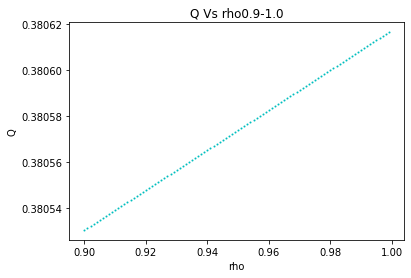

In [135]:
x = rho
y = inter

fig=plt.figure()
#ax=fig.add_axes([0,0,1,1])
plt.scatter(x, y, color='c',s=1)
plt.xlabel('rho')
plt.ylabel("Q")
plt.title('Q Vs rho'+str(r[0])+'-'+str(r[1]))
plt.savefig('graphs/'+str(r[0])+'-'+str(r[1])+'.png')

# IGNORE

In [413]:
max_bound = 1.0 * np.ones(1)
min_bound = 0*max_bound
bounds = (min_bound, max_bound)

my_topology = Star() # The Topology Class
my_options = {'c1': 0.6, 'c2': 0.3, 'w': 0.9} # arbitrarily set
my_swarm = P.create_swarm(n_particles=100, dimensions=1, options=my_options,bounds=bounds) # The Swarm Class

print('The following are the attributes of our swarm: {}'.format(my_swarm.__dict__.keys()))

The following are the attributes of our swarm: dict_keys(['position', 'velocity', 'n_particles', 'dimensions', 'options', 'pbest_pos', 'best_pos', 'pbest_cost', 'best_cost', 'current_cost'])


In [512]:

iterations = 100 # Set 100 iterations
costs = []
positions = []
K =[]
L=[]
for d in range(len(df)):
    q.setparams(K=df['ICR'][d],L=df['NLIQ'][d])
    print(q.K,q.L)
    
    my_swarm = P.create_swarm(n_particles=5, dimensions=1, options=my_options,bounds=bounds) # The Swarm Class
    print('The following are the attributes of our swarm: {}'.format(my_swarm.__dict__.keys()))
    for i in range(iterations):
        # Part 1: Update personal best
        my_swarm.current_cost = f(my_swarm.position) # Compute current cost
        #print(my_swarm.current_cost)
        my_swarm.pbest_cost = f(my_swarm.pbest_pos)  # Compute personal best pos
        my_swarm.pbest_pos, my_swarm.pbest_cost = P.compute_pbest(my_swarm) # Update and store

        # Part 2: Update global best
        # Note that gbest computation is dependent on your topology
        if np.min(my_swarm.pbest_cost) < my_swarm.best_cost:
            my_swarm.best_pos, my_swarm.best_cost = my_topology.compute_gbest(my_swarm)

        # Let's print our output
        if i%20==0:
            print('Iteration: {} | my_swarm.best_cost: {:.4f}'.format(i+1, my_swarm.best_cost))

        # Part 3: Update position and velocity matrices
        # Note that position and velocity updates are dependent on your topology
        my_swarm.velocity = my_topology.compute_velocity(my_swarm)
        my_swarm.position = my_topology.compute_position(my_swarm)
        
    print('The best cost found by our swarm is: {:.4f}'.format(my_swarm.best_cost))
    costs.append(my_swarm.best_cost)
    print('The best position found by our swarm is: {}'.format(my_swarm.best_pos))
    positions.append(my_swarm.best_pos[0])

0.3061728395 0.38888888899999996
The following are the attributes of our swarm: dict_keys(['position', 'velocity', 'n_particles', 'dimensions', 'options', 'pbest_pos', 'best_pos', 'pbest_cost', 'best_cost', 'current_cost'])
Iteration: 1 | my_swarm.best_cost: 1.1342
Iteration: 21 | my_swarm.best_cost: 0.0062
Iteration: 41 | my_swarm.best_cost: 0.0001
Iteration: 61 | my_swarm.best_cost: 0.0000
Iteration: 81 | my_swarm.best_cost: 0.0000
The best cost found by our swarm is: 0.0000
The best position found by our swarm is: [-13.73086102]
0.6666666667 0.77027027
The following are the attributes of our swarm: dict_keys(['position', 'velocity', 'n_particles', 'dimensions', 'options', 'pbest_pos', 'best_pos', 'pbest_cost', 'best_cost', 'current_cost'])
Iteration: 1 | my_swarm.best_cost: 1.0271
Iteration: 21 | my_swarm.best_cost: 0.1839
Iteration: 41 | my_swarm.best_cost: 0.0425
Iteration: 61 | my_swarm.best_cost: 0.0209
Iteration: 81 | my_swarm.best_cost: 0.0128
The best cost found by our swarm 

/Users/poulamisarkar/opt/anaconda3/envs/work/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':



Iteration: 61 | my_swarm.best_cost: 0.0000
Iteration: 81 | my_swarm.best_cost: 0.0000
The best cost found by our swarm is: 0.0000
The best position found by our swarm is: [-64.16211562]
0.0 0.609631728
The following are the attributes of our swarm: dict_keys(['position', 'velocity', 'n_particles', 'dimensions', 'options', 'pbest_pos', 'best_pos', 'pbest_cost', 'best_cost', 'current_cost'])
Iteration: 1 | my_swarm.best_cost: 0.0000
Iteration: 21 | my_swarm.best_cost: 0.0000
Iteration: 41 | my_swarm.best_cost: 0.0000
Iteration: 61 | my_swarm.best_cost: 0.0000
Iteration: 81 | my_swarm.best_cost: 0.0000
The best cost found by our swarm is: 0.0000
The best position found by our swarm is: [0.31044877]
0.0 0.9107142859999999
The following are the attributes of our swarm: dict_keys(['position', 'velocity', 'n_particles', 'dimensions', 'options', 'pbest_pos', 'best_pos', 'pbest_cost', 'best_cost', 'current_cost'])
Iteration: 1 | my_swarm.best_cost: 0.0000
Iteration: 21 | my_swarm.best_cost: 0.

The best cost found by our swarm is: 0.0017
The best position found by our swarm is: [-28.06314421]
0.0 0.756448989
The following are the attributes of our swarm: dict_keys(['position', 'velocity', 'n_particles', 'dimensions', 'options', 'pbest_pos', 'best_pos', 'pbest_cost', 'best_cost', 'current_cost'])
Iteration: 1 | my_swarm.best_cost: 0.0000
Iteration: 21 | my_swarm.best_cost: 0.0000
Iteration: 41 | my_swarm.best_cost: 0.0000
Iteration: 61 | my_swarm.best_cost: 0.0000
Iteration: 81 | my_swarm.best_cost: 0.0000
The best cost found by our swarm is: 0.0000
The best position found by our swarm is: [0.38464782]
0.0 0.84965035
The following are the attributes of our swarm: dict_keys(['position', 'velocity', 'n_particles', 'dimensions', 'options', 'pbest_pos', 'best_pos', 'pbest_cost', 'best_cost', 'current_cost'])
Iteration: 1 | my_swarm.best_cost: 0.0000
Iteration: 21 | my_swarm.best_cost: 0.0000
Iteration: 41 | my_swarm.best_cost: 0.0000
Iteration: 61 | my_swarm.best_cost: 0.0000
Iter

In [526]:
df = pd.read_csv("result.csv")

In [598]:
len(positions)

50

In [618]:
np.nan

nan